<a href="https://colab.research.google.com/github/clerfayt28/Pitonchik/blob/main/%D0%9B%D0%B0%D0%B1%D0%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
m, g = 6, 9.8
k, b = 5e+3, 8
alpha, omega, fi=2.5, (k/m)**0.5, np.pi

In [139]:
x0, v0 = 0.2, 0.3
tn = 3
n = int(10000)

In [140]:
def right_side_odu(xi,vi):
  f1 = vi
  f2 = - g - k/m * xi - b/m * vi
  return f1, f2

In [141]:
def solver_odu_rk(x0, v0, tn, n):
  T, dt = np.linspace (0, tn, n, retstep=True)
  M = np.zeros((4,2))
  X = np.zeros(n)
  V = np.zeros(n)
  #Начальные условия:
  X[0] = x0
  V[0] = v0
  for i in range (n-1):

    M[0,0], M[0,1] = right_side_odu(X[i], V[i])
    M[1,0], M[1,1] = right_side_odu(X[i] + dt/2* M[0,0], V[i]+dt/2 * M[0,1])
    M[2,0], M[2,1] = right_side_odu(X[i] + dt/2* M[1,0], V[i]+dt/2 * M[1,1])
    M[3,0], M[3,1] = right_side_odu(X[i] + dt * M[2,0], V[i] + dt * M[2,1])


    X[i+1] = X[i] + dt * (M[0,0] + 2*M[1,0] + 2*M[2,0] + M[3,0])/6
    V[i+1] = V[i] + dt * (M[0,1] + 2*M[1,1] + 2*M[2,1] + M[3,1])/6

  return T, X, V

In [142]:
T, X, V = solver_odu_rk (x0, v0, tn, n)

Text(0, 0.5, 'v(t), m/s')

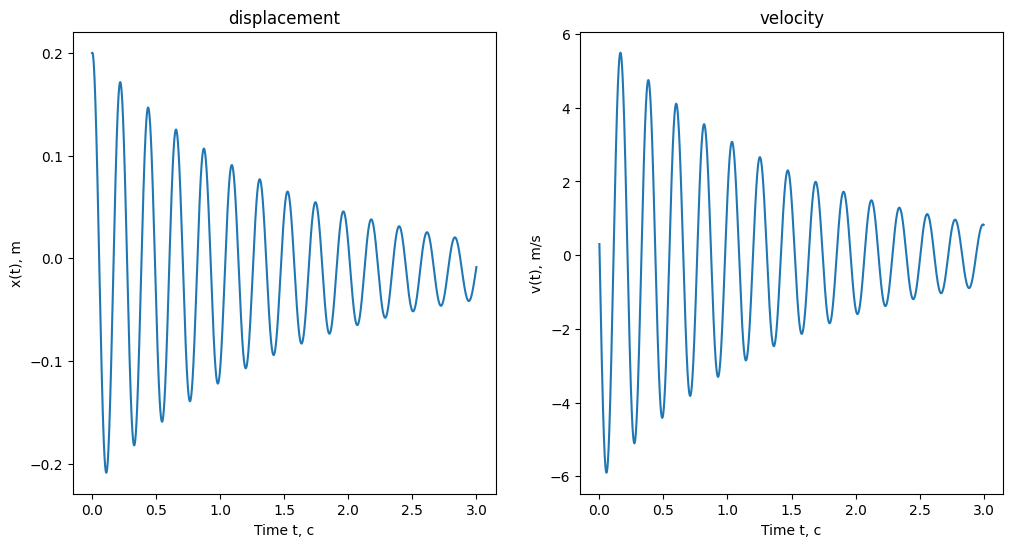

In [143]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(T, X)
plt.title('displacement')
plt.xlabel('Time t, c')
plt.ylabel('x(t), m')

plt.subplot(1,2,2)
plt.plot(T, V)
plt.title('velocity')
plt.xlabel('Time t, c')
plt.ylabel('v(t), m/s')